<a href="https://colab.research.google.com/github/Dinoelfantastico/librarys/blob/main/Algoritmo_de_prim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
!git clone https://github.com/Dinoelfantastico/librarys.git 2>/dev/null

In [113]:
from librarys.Carpeta import graphstuff as gs
import networkx as nx
import math
import heapq as hp

In [114]:
%%file 1.csv
0,1,2
1,2,1
2,3,1
3,0,1
0,2,3
1,3,5

Overwriting 1.csv


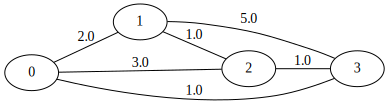

In [115]:
G = nx.read_weighted_edgelist('1.csv',delimiter=',',nodetype=int)
gs.nx2gv(G,weighted=True)


In [116]:
def Prim(G,S):
  for u in G.nodes:
    G.nodes[u]['visited'] = False
    G.nodes[u]['cost'] = math.inf
    G.nodes[u]['path'] = -1
  
  G.nodes[S]['cost'] = 0
  Cola = [(0,S)]
  costo = 0
  while Cola:
    g_u,u = hp.heappop(Cola)
    if not G.nodes[u]['visited']:
      G.nodes[u]['visited'] = True
      costo+=g_u
      for v in G.neighbors(u):
        if not G.nodes[v]['visited']:
          w = G.edges[u,v]['weight']
          C_v = G.nodes[v]['cost']
          if w<C_v:
            G.nodes[v]['cost'] = w
            G.nodes[v]['path'] = u
            hp.heappush(Cola,(w,v))
  
  path = [-1]*G.number_of_nodes()
  for u in G.nodes:
    path[u] = G.nodes[u]['path']
  
  return path,costo

Costo total -> 3.0


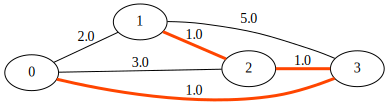

In [117]:
path,costo = Prim(G,0)
print(f"Costo total -> {costo}")
gs.nx2gv(G,weighted=True,path=path)

In [118]:
%%file 1.csv
0,1,1
0,2,3
1,2,1
1,3,7
2,4,1
1,4,3
3,4,1
3,5,1
4,5,6

Overwriting 1.csv


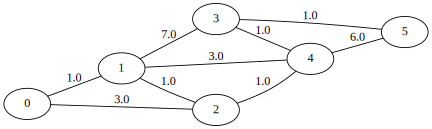

In [119]:
G = nx.read_weighted_edgelist('1.csv',delimiter=',',nodetype=int)
gs.nx2gv(G,weighted=True)

Costo  total -> 5.0


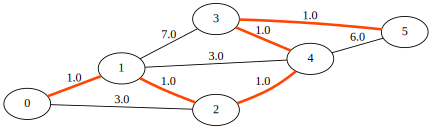

In [120]:
path,costo = Prim(G,0)
print(f"Costo  total -> {costo}")
gs.nx2gv(G,weighted=True,path=path)